In [1]:
import numpy as np
import pandas as pd
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense, Dropout,Conv2D,Flatten,MaxPooling2D
from keras.optimizers import Adam
from keras.utils import to_categorical
import pickle

C:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train = x_train/255
x_test = x_test/255
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)
y_train = to_categorical(y_train)
y_test_true = np.copy(y_test)
y_test = to_categorical(y_test)

In [4]:
def build_model():
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same',
                     input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    
    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    
    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Dropout(0.5))
    
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))
    
    model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [5]:
model = build_model()
log = model.fit(x_train,y_train,epochs=15,batch_size=64,shuffle=True,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 18s 382us/step - loss: 0.3169 - acc: 0.8988 - val_loss: 0.0630 - val_acc: 0.9804
Epoch 2/15
48000/48000 [==============================] - 15s 312us/step - loss: 0.0952 - acc: 0.9699 - val_loss: 0.0475 - val_acc: 0.9864
Epoch 3/15
48000/48000 [==============================] - 15s 313us/step - loss: 0.0715 - acc: 0.9773 - val_loss: 0.0362 - val_acc: 0.9900
Epoch 4/15
48000/48000 [==============================] - 15s 312us/step - loss: 0.0596 - acc: 0.9808 - val_loss: 0.0409 - val_acc: 0.9872
Epoch 5/15
48000/48000 [==============================] - 15s 313us/step - loss: 0.0523 - acc: 0.9838 - val_loss: 0.0342 - val_acc: 0.9889
Epoch 6/15
48000/48000 [==============================] - 15s 316us/step - loss: 0.0446 - acc: 0.9859 - val_loss: 0.0302 - val_acc: 0.9908
Epoch 7/15
48000/48000 [==============================] - 15s 321us/step - loss: 0.0406 - acc: 0.9866 - val_loss: 0.

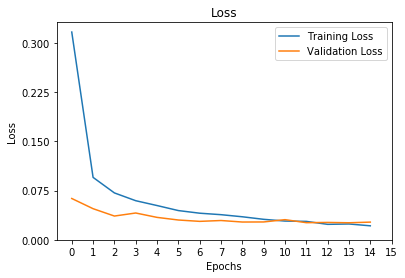

In [7]:
plt.plot(log.history['loss'])
plt.plot(log.history['val_loss'])
plt.xticks(range(16))
plt.yticks(np.linspace(0.3,0,5))
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Training Loss','Validation Loss'])

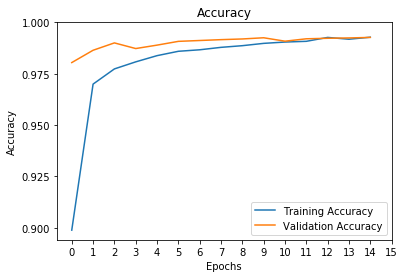

In [8]:
plt.plot(log.history['acc'])
plt.plot(log.history['val_acc'])
plt.xticks(range(16))
plt.yticks(np.linspace(0.9,1,5))
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['Training Accuracy','Validation Accuracy'])

In [9]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 2s 198us/step


[0.021605044037977496, 0.9934]

In [10]:
# from keras.models import load_model
# model = load_model('MNIST.h5')
# pickle.dump(model,open('mnist.pkl','wb'))
# model = pickle.load(open('mnist.pkl','rb'))

In [11]:
predictions = model.predict(x_test)

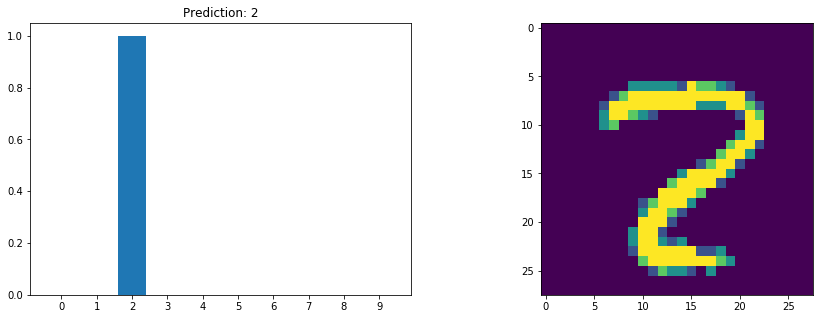

In [12]:
r = np.random.randint(0,len(x_test)-1)
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].bar([0,1,2,3,4,5,6,7,8,9],predictions[r])
ax[0].set_xticks([0,1,2,3,4,5,6,7,8,9])
ax[0].set_title("Prediction: "+str(np.argmax(predictions[r])))
ax[1].imshow(x_test[r].reshape(28,28))

In [13]:
x_test = x_test.reshape(10000,28,28)
Y_pred_class = []
X_Image = []
for image,prediction in zip(x_test,predictions):
    Y_pred_class.append(np.argmax(prediction))
    X_Image.append(image)
df = pd.DataFrame()
df["True"] = y_test_true
df["Predicted"] = Y_pred_class
df["Image"] = X_Image
Error_Images = df[["Image","True","Predicted"]][df["True"]!=df["Predicted"]]

In [14]:
Error_Images.head()

,Image,True,Predicted
445,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",6,0
625,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",6,4
646,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",2,4
846,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",7,9
938,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",3,5


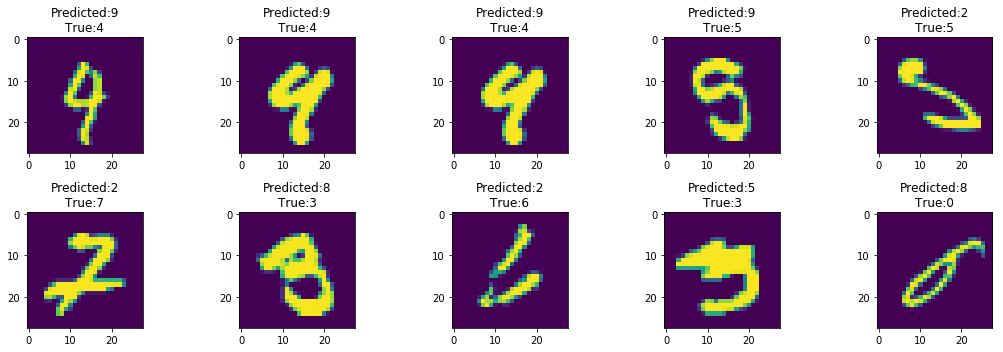

In [16]:
Error_Images_array = np.array(Error_Images["Image"])
fig,ax = plt.subplots(2,5,figsize=(15,5))
for i in range(2):
    for j in range(5):
        r = np.random.randint(0,len(Error_Images)-1)
        ax[i][j].imshow(Error_Images_array[r])
        ax[i][j].set_title("Predicted:"+str(np.array(Error_Images["Predicted"])[r])+"\nTrue:"+str(np.array(Error_Images["True"])[r]))
plt.tight_layout()